# Introduction

In this notebook I will walk you through our journey in IEEE ManCSC internal competition.
- This notebooks will cover the following steps:
    
    > 1. [Scraping the data from the web.](#Scraping)
    > 2. [Data cleaning and manipulation.](#Manipulation)
    > 3. [Preprocessing and feature engineering.](#Preprocessing)
    > 4. [Model building and evaluation.](#Modeling)

# Scraping

In [1]:
# Scraping step libraries
import warnings
warnings.filterwarnings('ignore') 
import pandas as pd 
from bs4 import BeautifulSoup 
import time 
import undetected_chromedriver as uc 

# Manipulating data step libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling step libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import lightgbm as lgb
import catboost as cb
import xgboost as xgb


In [2]:
standings_url = "https://fbref.com/en/comps/9/2023-2024/2023-2024-Premier-League-Stats"

In [3]:
driver = uc.Chrome()

In [4]:
driver.get(standings_url)

In [5]:
soup = BeautifulSoup(driver.page_source, 'html.parser')


In [6]:
soup = BeautifulSoup(driver.page_source, 'html.parser')
standings_table = soup.select('table.stats_table')[0]
links = standings_table.find_all('a')
links = [l.get("href") for l in links]
links = [l for l in links if '/squads/' in l]

In [7]:
links

['/en/squads/b8fd03ef/2023-2024/Manchester-City-Stats',
 '/en/squads/18bb7c10/2023-2024/Arsenal-Stats',
 '/en/squads/822bd0ba/2023-2024/Liverpool-Stats',
 '/en/squads/8602292d/2023-2024/Aston-Villa-Stats',
 '/en/squads/361ca564/2023-2024/Tottenham-Hotspur-Stats',
 '/en/squads/cff3d9bb/2023-2024/Chelsea-Stats',
 '/en/squads/b2b47a98/2023-2024/Newcastle-United-Stats',
 '/en/squads/19538871/2023-2024/Manchester-United-Stats',
 '/en/squads/7c21e445/2023-2024/West-Ham-United-Stats',
 '/en/squads/47c64c55/2023-2024/Crystal-Palace-Stats',
 '/en/squads/d07537b9/2023-2024/Brighton-and-Hove-Albion-Stats',
 '/en/squads/4ba7cbea/2023-2024/Bournemouth-Stats',
 '/en/squads/fd962109/2023-2024/Fulham-Stats',
 '/en/squads/8cec06e1/2023-2024/Wolverhampton-Wanderers-Stats',
 '/en/squads/d3fd31cc/2023-2024/Everton-Stats',
 '/en/squads/cd051869/2023-2024/Brentford-Stats',
 '/en/squads/e4a775cb/2023-2024/Nottingham-Forest-Stats',
 '/en/squads/e297cd13/2023-2024/Luton-Town-Stats',
 '/en/squads/943e8050/2023-

In [8]:
team_urls = [f"https://fbref.com{l}" for l in links]

In [9]:
driver.get(team_urls[0])

In [10]:
import pandas as pd
matches = pd.read_html(driver.page_source, match="Scores & Fixtures")[0]

In [11]:
matches.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Match Report,Notes
0,2023-08-06,16:00 (18:00),Community Shield,FA Community Shield,Sun,Neutral,D,1 (1),1 (4),Arsenal,NaN,NaN,55,81145,Kyle Walker,4-2-3-1,4-3-3,Stuart Attwell,Match Report,Arsenal won on penalty kicks following normal ...
1,2023-08-11,20:00 (22:00),Premier League,Matchweek 1,Fri,Away,W,3,0,Burnley,1.9,0.3,65,21572,Kevin De Bruyne,4-2-3-1,5-4-1,Craig Pawson,Match Report,NaN
2,2023-08-16,22:00,Super Cup,UEFA Super Cup,Wed,Home,D,1 (5),1 (4),es Sevilla,NaN,NaN,74,NaN,Kyle Walker,4-2-3-1,4-2-3-1,François Letexier,Match Report,NaN
3,2023-08-19,20:00 (22:00),Premier League,Matchweek 2,Sat,Home,W,1,0,Newcastle Utd,1.0,0.3,59,53419,Kyle Walker,4-2-3-1,4-3-3,Robert Jones,Match Report,NaN
4,2023-08-27,14:00 (16:00),Premier League,Matchweek 3,Sun,Away,W,2,1,Sheffield Utd,3.5,0.7,79,31336,Kyle Walker,4-2-3-1,3-5-2,Jarred Gillett,Match Report,NaN


In [12]:
matches.shape

(59, 20)

In [13]:
soup = BeautifulSoup(driver.page_source, 'html.parser')
links = soup.find_all('a')
links = [l.get("href") for l in links]
links = [l for l in links if l and 'all_comps/shooting/' in l]

In [14]:
driver.get(f"https://fbref.com{links[0]}")

In [15]:
shooting = pd.read_html(driver.page_source, match="Shooting")[0]

In [16]:
shooting.head()

For Manchester City                                                        \
                 Date           Time              Comp                Round   
0          2023-08-06  16:00 (18:00)  Community Shield  FA Community Shield   
1          2023-08-11  20:00 (22:00)    Premier League          Matchweek 1   
2          2023-08-16          22:00         Super Cup       UEFA Super Cup   
3          2023-08-19  20:00 (22:00)    Premier League          Matchweek 2   
4          2023-08-27  14:00 (16:00)    Premier League          Matchweek 3   

                                                     ... Standard          \
   Day    Venue Result     GF     GA       Opponent  ...     Dist   FK PK   
0  Sun  Neutral      D  1 (1)  1 (4)        Arsenal  ...      NaN  NaN  0   
1  Fri     Away      W      3      0        Burnley  ...     13.9    0  0   
2  Wed     Home      D  1 (5)  1 (4)     es Sevilla  ...      NaN  NaN  0   
3  Sat     Home      W      1      0  Newcastle Utd  ...     17.9    0  0   
4  Sun     Away      W      2      1  Sheffield Utd  ...     17.3    2  0   

        Expected                            Unnamed: 25_level_0  
  PKatt       xG npxG npxG/Sh  G-xG np:G-xG        Match Report  
0     0      NaN  NaN     NaN   NaN     NaN        Match Report  
1     0      1.9  1.9    0.12  +1.1    +1.1        Match Report  
2     0      NaN  NaN     NaN   NaN     NaN        Match Report  
3     0      1.0  1.0    0.07   0.0     0.0        Match Report  
4     1      3.5  2.8    0.10  -1.5    -0.8        Match Report  

[5 rows x 26 columns]

In [17]:
shooting.columns = shooting.columns.droplevel()

In [18]:
team_data = matches.merge(shooting[["Date", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]], on="Date")

In [19]:
team_data.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Opp Formation,Referee,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt
0,2023-08-06,16:00 (18:00),Community Shield,FA Community Shield,Sun,Neutral,D,1 (1),1 (4),Arsenal,...,4-3-3,Stuart Attwell,Match Report,Arsenal won on penalty kicks following normal ...,8,4,NaN,NaN,0,0
1,2023-08-11,20:00 (22:00),Premier League,Matchweek 1,Fri,Away,W,3,0,Burnley,...,5-4-1,Craig Pawson,Match Report,NaN,17,8,13.9,0,0,0
2,2023-08-16,22:00,Super Cup,UEFA Super Cup,Wed,Home,D,1 (5),1 (4),es Sevilla,...,4-2-3-1,François Letexier,Match Report,NaN,23,7,NaN,NaN,0,0
3,2023-08-19,20:00 (22:00),Premier League,Matchweek 2,Sat,Home,W,1,0,Newcastle Utd,...,4-3-3,Robert Jones,Match Report,NaN,14,4,17.9,0,0,0
4,2023-08-27,14:00 (16:00),Premier League,Matchweek 3,Sun,Away,W,2,1,Sheffield Utd,...,3-5-2,Jarred Gillett,Match Report,NaN,29,9,17.3,2,0,1


In [20]:
years = list(range(2024, 2019, -1))
all_matches = []

In [21]:
years

[2024, 2023, 2022, 2021, 2020]

In [22]:
standings_url = "https://fbref.com/en/comps/9/2023-2024/2023-2024-Premier-League-Stats"

In [23]:
for year in years:
    # Load the standings page
    driver.get(standings_url)
    time.sleep(2)  # Wait for the page to load

    # Parse the page source with BeautifulSoup
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    
    # Select the standings table
    standings_table = soup.select('table.stats_table')[0]

    # Extract links to team pages
    links = [l.get("href") for l in standings_table.find_all('a')]
    links = [l for l in links if '/squads/' in l]
    team_urls = [f"https://fbref.com{l}" for l in links]

    # Get the link for the previous season
    previous_season = soup.select("a.prev")[0].get("href")
    standings_url = f"https://fbref.com{previous_season}"

    # Iterate over each team's URL
    for team_url in team_urls:
        # Extract and format the team name
        team_name = team_url.split("/")[-1].replace("-Stats", "").replace("-", " ")

        # Load the team page
        driver.get(team_url)
        time.sleep(1)  # Wait for the page to load

        # Read the matches table into a DataFrame
        matches = pd.read_html(driver.page_source, match="Scores & Fixtures")[0]

        # Parse the page source again for the shooting data link
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        links = [l.get("href") for l in soup.find_all('a')]
        links = [l for l in links if l and 'all_comps/shooting/' in l]

        # Load the shooting data page
        driver.get(f"https://fbref.com{links[0]}")
        time.sleep(1)  # Wait for the page to load

        # Read the shooting data into a DataFrame
        shooting = pd.read_html(driver.page_source, match="Shooting")[0]
        shooting.columns = shooting.columns.droplevel()  # Adjust columns

        # Merge matches and shooting data on the 'Date' column
        try:
            team_data = matches.merge(shooting[["Date", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]], on="Date")
        except ValueError:
            continue  # Skip to the next team if there is a merge error

        # Filter for Premier League matches only
        team_data = team_data[team_data["Comp"] == "Premier League"]

        # Add season and team information to the data
        team_data["Season"] = year
        team_data["Team"] = team_name

        # Append the team data to the all_matches list
        all_matches.append(team_data)
    
    print(f"Finished {year}")

Finished 2024
Finished 2023
Finished 2022
Finished 2021
Finished 2020


In [24]:
len(all_matches)

100

In [25]:
match_df = pd.concat(all_matches)

In [26]:
match_df.columns = [c.lower() for c in match_df.columns]

In [27]:
match_df

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2023-08-11,20:00 (22:00),Premier League,Matchweek 1,Fri,Away,W,3,0,Burnley,...,Match Report,NaN,17,8,13.9,0,0,0,2024,Manchester City
3,2023-08-19,20:00 (22:00),Premier League,Matchweek 2,Sat,Home,W,1,0,Newcastle Utd,...,Match Report,NaN,14,4,17.9,0,0,0,2024,Manchester City
4,2023-08-27,14:00 (16:00),Premier League,Matchweek 3,Sun,Away,W,2,1,Sheffield Utd,...,Match Report,NaN,29,9,17.3,2,0,1,2024,Manchester City
5,2023-09-02,15:00 (17:00),Premier League,Matchweek 4,Sat,Home,W,5,1,Fulham,...,Match Report,NaN,6,4,14.8,0,1,1,2024,Manchester City
6,2023-09-16,15:00 (17:00),Premier League,Matchweek 5,Sat,Away,W,3,1,West Ham,...,Match Report,NaN,29,13,16.4,1,0,0,2024,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,2020-07-07,18:00 (19:00),Premier League,Matchweek 34,Tue,Away,L,1,2,Watford,...,Match Report,NaN,12,3,16.9,1,0,0,2020,Norwich City
40,2020-07-11,12:30 (13:30),Premier League,Matchweek 35,Sat,Home,L,0,4,West Ham,...,Match Report,NaN,11,2,19.8,1,0,0,2020,Norwich City
41,2020-07-14,20:15 (21:15),Premier League,Matchweek 36,Tue,Away,L,0,1,Chelsea,...,Match Report,NaN,2,0,20.6,0,0,0,2020,Norwich City
42,2020-07-18,17:30 (18:30),Premier League,Matchweek 37,Sat,Home,L,0,2,Burnley,...,Match Report,NaN,6,2,13.4,0,0,0,2020,Norwich City


In [28]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3800 entries, 1 to 43
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           3800 non-null   object
 1   time           3800 non-null   object
 2   comp           3800 non-null   object
 3   round          3800 non-null   object
 4   day            3800 non-null   object
 5   venue          3800 non-null   object
 6   result         3800 non-null   object
 7   gf             3800 non-null   object
 8   ga             3800 non-null   object
 9   opponent       3800 non-null   object
 10  xg             3800 non-null   object
 11  xga            3800 non-null   object
 12  poss           3800 non-null   object
 13  attendance     2918 non-null   object
 14  captain        3800 non-null   object
 15  formation      3800 non-null   object
 16  opp formation  3800 non-null   object
 17  referee        3800 non-null   object
 18  match report   3800 non-null   obje

# Manipulation

In [29]:
df = match_df

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3800 entries, 1 to 43
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           3800 non-null   object
 1   time           3800 non-null   object
 2   comp           3800 non-null   object
 3   round          3800 non-null   object
 4   day            3800 non-null   object
 5   venue          3800 non-null   object
 6   result         3800 non-null   object
 7   gf             3800 non-null   object
 8   ga             3800 non-null   object
 9   opponent       3800 non-null   object
 10  xg             3800 non-null   object
 11  xga            3800 non-null   object
 12  poss           3800 non-null   object
 13  attendance     2918 non-null   object
 14  captain        3800 non-null   object
 15  formation      3800 non-null   object
 16  opp formation  3800 non-null   object
 17  referee        3800 non-null   object
 18  match report   3800 non-null   obje

In [31]:
df.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2023-08-11,20:00 (22:00),Premier League,Matchweek 1,Fri,Away,W,3,0,Burnley,...,Match Report,NaN,17,8,13.9,0,0,0,2024,Manchester City
3,2023-08-19,20:00 (22:00),Premier League,Matchweek 2,Sat,Home,W,1,0,Newcastle Utd,...,Match Report,NaN,14,4,17.9,0,0,0,2024,Manchester City
4,2023-08-27,14:00 (16:00),Premier League,Matchweek 3,Sun,Away,W,2,1,Sheffield Utd,...,Match Report,NaN,29,9,17.3,2,0,1,2024,Manchester City
5,2023-09-02,15:00 (17:00),Premier League,Matchweek 4,Sat,Home,W,5,1,Fulham,...,Match Report,NaN,6,4,14.8,0,1,1,2024,Manchester City
6,2023-09-16,15:00 (17:00),Premier League,Matchweek 5,Sat,Away,W,3,1,West Ham,...,Match Report,NaN,29,13,16.4,1,0,0,2024,Manchester City


## Features description

- **date** : the date of the game
- **time** : the time of the game
- **comp** : the competition of the game
- **round** : the round of the game
- **day** : the day of the week of the game
- **venue** : the venue of the game
- **result** : the result of the game
- **gf** : the goals for the home team
- **ga** : the goals for the away team
- **opponent**: the opponent of the home team
- **xg** : the expected goals for the home team
- **xga** : the expected goals for the away team
- **poss** : the possession of the home team
- **captain** : the captain of the home team
- **formation** : the formation of the home team
- **referee** : the referee of the game
- **sh** : the shots of the home team
- **sot** : the shots on target of the home team
- **dist** : the average distance of the shots of the home team
- **fk** : the free kicks of the home team
- **pk** : the penalty kicks of the home team
- **pka** : the penalty kicks attempted of the home team
- **season** : the season year of the match
- **team**: the home team

In [32]:
df.drop(columns=["comp", "round", "attendance", "match report", "notes"], inplace=True)

In [33]:
df.describe()

,season
count,3800.0000
mean,2022.0000
std,1.4144
min,2020.0000
25%,2021.0000
50%,2022.0000
75%,2023.0000
max,2024.0000


In [34]:
df.head()

,date,time,day,venue,result,gf,ga,opponent,xg,xga,...,opp formation,referee,sh,sot,dist,fk,pk,pkatt,season,team
1,2023-08-11,20:00 (22:00),Fri,Away,W,3,0,Burnley,1.9,0.3,...,5-4-1,Craig Pawson,17,8,13.9,0,0,0,2024,Manchester City
3,2023-08-19,20:00 (22:00),Sat,Home,W,1,0,Newcastle Utd,1.0,0.3,...,4-3-3,Robert Jones,14,4,17.9,0,0,0,2024,Manchester City
4,2023-08-27,14:00 (16:00),Sun,Away,W,2,1,Sheffield Utd,3.5,0.7,...,3-5-2,Jarred Gillett,29,9,17.3,2,0,1,2024,Manchester City
5,2023-09-02,15:00 (17:00),Sat,Home,W,5,1,Fulham,2.2,1.4,...,4-3-3,Michael Oliver,6,4,14.8,0,1,1,2024,Manchester City
6,2023-09-16,15:00 (17:00),Sat,Away,W,3,1,West Ham,3.6,0.9,...,4-2-3-1,Andy Madley,29,13,16.4,1,0,0,2024,Manchester City


In [35]:
df.dtypes

date             object
time             object
day              object
venue            object
result           object
gf               object
ga               object
opponent         object
xg               object
xga              object
poss             object
captain          object
formation        object
opp formation    object
referee          object
sh               object
sot              object
dist             object
fk               object
pk               object
pkatt            object
season            int64
team             object
dtype: object

In [36]:
df["date"] = pd.to_datetime(df["date"])

In [37]:
df['venue'] = df['venue'].astype('category')
df['opponent'] = df['opponent'].astype('category')
df['team'] = df['team'].astype('category')
df['result'] = df['result'].astype('category')
df['day'] = df['date'].dt.day_name()

In [38]:
df["hour"] = df["time"].str.replace(":.+", "", regex=True).astype("int")

In [39]:
df["day_code"] = df["date"].dt.dayofweek

In [40]:
df.duplicated().sum()

0

In [41]:
df.dropna(inplace=True)

In [42]:
df.formation.value_counts()

formation
4-2-3-1       1108
4-3-3          821
4-4-2          454
3-4-3          436
3-5-2          225
4-1-4-1        184
4-4-1-1        116
5-3-2           82
5-4-1           78
3-4-1-2         73
4-5-1           48
4-3-1-2         35
4-1-2-1-2◆      28
4-2-2-2         25
3-2-4-1         21
4-3-2-1         20
3-1-4-2         16
3-5-1-1         12
3-3-3-1         12
4-2-4-0          2
3-4-3◆           2
4-1-3-2          1
Name: count, dtype: int64

In [43]:
df.formation = df.formation.str.replace("◆", "")
df.formation = df.formation.str.replace("-0", "")

In [44]:
df.formation.value_counts()

formation
4-2-3-1      1108
4-3-3         821
4-4-2         454
3-4-3         438
3-5-2         225
4-1-4-1       184
4-4-1-1       116
5-3-2          82
5-4-1          78
3-4-1-2        73
4-5-1          48
4-3-1-2        35
4-1-2-1-2      28
4-2-2-2        25
3-2-4-1        21
4-3-2-1        20
3-1-4-2        16
3-5-1-1        12
3-3-3-1        12
4-2-4           2
4-1-3-2         1
Name: count, dtype: int64

In [45]:
df['season'].value_counts()

season
2024    760
2023    760
2022    760
2020    760
2021    759
Name: count, dtype: int64

In [46]:
df_cols = df.columns
df_cols = df_cols.drop('season')

df.duplicated(subset=df_cols).sum()

0

In [47]:
df.drop_duplicates(subset=df_cols, inplace=True)

In [48]:
df.duplicated(subset=df_cols).sum()

0

In [49]:
def correct_seasons(df):
    def get_correct_season(date):
        if isinstance(date, str):
            date = pd.to_datetime(date)
        if date.month >= 8:
            return date.year + 1
        else:
            return date.year

    df['season'] = df['date'].apply(get_correct_season)
    return df

In [50]:
df = correct_seasons(df)
df['season'].value_counts()

season
2024    760
2023    760
2022    760
2020    760
2021    759
Name: count, dtype: int64

In [51]:
df['points'] = df['result'].apply(lambda x: 3 if x == 'W' else 1 if x == 'D' else 0)

In [52]:
df['points'] = df['points'].astype('int')

In [53]:
winners = df.groupby(['season', 'team'], observed=False)['points'].sum().reset_index() \
  .sort_values(['season', 'points'], ascending=[True, False]) \
  .groupby('season', observed=False).first()


In [54]:
winners 

,team,points
season,,
2020,Liverpool,99
2021,Manchester City,86
2022,Manchester City,93
2023,Manchester City,89
2024,Manchester City,91


In [55]:
df['season_winner'] = df['season'].map(winners['team'])

In [56]:
df.head()

,date,time,day,venue,result,gf,ga,opponent,xg,xga,...,dist,fk,pk,pkatt,season,team,hour,day_code,points,season_winner
1,2023-08-11,20:00 (22:00),Friday,Away,W,3,0,Burnley,1.9,0.3,...,13.9,0,0,0,2024,Manchester City,20,4,3,Manchester City
3,2023-08-19,20:00 (22:00),Saturday,Home,W,1,0,Newcastle Utd,1.0,0.3,...,17.9,0,0,0,2024,Manchester City,20,5,3,Manchester City
4,2023-08-27,14:00 (16:00),Sunday,Away,W,2,1,Sheffield Utd,3.5,0.7,...,17.3,2,0,1,2024,Manchester City,14,6,3,Manchester City
5,2023-09-02,15:00 (17:00),Saturday,Home,W,5,1,Fulham,2.2,1.4,...,14.8,0,1,1,2024,Manchester City,15,5,3,Manchester City
6,2023-09-16,15:00 (17:00),Saturday,Away,W,3,1,West Ham,3.6,0.9,...,16.4,1,0,0,2024,Manchester City,15,5,3,Manchester City


In [57]:
df.shape

(3799, 27)

In [58]:
df['season'].value_counts()

season
2024    760
2023    760
2022    760
2020    760
2021    759
Name: count, dtype: int64

In [59]:
def captains_func(data):
    if data['count'] == 0:
        data['count'] = np.nan
    return data

In [60]:
group = df.groupby('team', observed=False)['captain'].value_counts().reset_index(name='count')
group = group.apply(captains_func, axis=1)
group.dropna(inplace=True)
group = group.drop(columns='count')
group

,team,captain
0,Arsenal,Martin Ødegaard
1,Arsenal,Pierre-Emerick Aubameyang
2,Arsenal,Alexandre Lacazette
3,Arsenal,Granit Xhaka
4,Arsenal,Héctor Bellerín
...,...,...
4450,Wolverhampton Wanderers,Conor Coady
4451,Wolverhampton Wanderers,Max Kilman
4452,Wolverhampton Wanderers,Rúben Neves
4453,Wolverhampton Wanderers,João Moutinho


In [61]:
group['team'].value_counts()    

team
Chelsea                     12
Everton                     11
Arsenal                     10
Sheffield United             9
Crystal Palace               9
Tottenham Hotspur            8
Newcastle United             8
Manchester United            8
Manchester City              8
West Ham United              8
Watford                      8
Fulham                       7
Leicester City               7
Liverpool                    7
Aston Villa                  7
Brighton and Hove Albion     7
Nottingham Forest            7
Burnley                      6
Brentford                    6
Norwich City                 6
Bournemouth                  6
Wolverhampton Wanderers      5
Leeds United                 5
West Bromwich Albion         4
Luton Town                   4
Southampton                  3
Name: count, dtype: int64

In [62]:
group[group['team'] == 'Liverpool']

,team,captain
2136,Liverpool,Jordan Henderson
2137,Liverpool,Virgil van Dijk
2138,Liverpool,James Milner
2139,Liverpool,Georginio Wijnaldum
2140,Liverpool,Andrew Robertson
2141,Liverpool,Roberto Firmino
2142,Liverpool,Trent Alexander-Arnold


In [63]:
group.to_csv('captains.csv', index=False)

# Preprocessing

In [64]:
df.head()

,date,time,day,venue,result,gf,ga,opponent,xg,xga,...,dist,fk,pk,pkatt,season,team,hour,day_code,points,season_winner
1,2023-08-11,20:00 (22:00),Friday,Away,W,3,0,Burnley,1.9,0.3,...,13.9,0,0,0,2024,Manchester City,20,4,3,Manchester City
3,2023-08-19,20:00 (22:00),Saturday,Home,W,1,0,Newcastle Utd,1.0,0.3,...,17.9,0,0,0,2024,Manchester City,20,5,3,Manchester City
4,2023-08-27,14:00 (16:00),Sunday,Away,W,2,1,Sheffield Utd,3.5,0.7,...,17.3,2,0,1,2024,Manchester City,14,6,3,Manchester City
5,2023-09-02,15:00 (17:00),Saturday,Home,W,5,1,Fulham,2.2,1.4,...,14.8,0,1,1,2024,Manchester City,15,5,3,Manchester City
6,2023-09-16,15:00 (17:00),Saturday,Away,W,3,1,West Ham,3.6,0.9,...,16.4,1,0,0,2024,Manchester City,15,5,3,Manchester City


In [65]:
df.isna().sum()

date             0
time             0
day              0
venue            0
result           0
gf               0
ga               0
opponent         0
xg               0
xga              0
poss             0
captain          0
formation        0
opp formation    0
referee          0
sh               0
sot              0
dist             0
fk               0
pk               0
pkatt            0
season           0
team             0
hour             0
day_code         0
points           0
season_winner    0
dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3799 entries, 1 to 43
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3799 non-null   datetime64[ns]
 1   time           3799 non-null   object        
 2   day            3799 non-null   object        
 3   venue          3799 non-null   category      
 4   result         3799 non-null   category      
 5   gf             3799 non-null   object        
 6   ga             3799 non-null   object        
 7   opponent       3799 non-null   category      
 8   xg             3799 non-null   object        
 9   xga            3799 non-null   object        
 10  poss           3799 non-null   object        
 11  captain        3799 non-null   object        
 12  formation      3799 non-null   object        
 13  opp formation  3799 non-null   object        
 14  referee        3799 non-null   object        
 15  sh             3799 non-null

In [67]:
df.columns

Index(['date', 'time', 'day', 'venue', 'result', 'gf', 'ga', 'opponent', 'xg',
       'xga', 'poss', 'captain', 'formation', 'opp formation', 'referee', 'sh',
       'sot', 'dist', 'fk', 'pk', 'pkatt', 'season', 'team', 'hour',
       'day_code', 'points', 'season_winner'],
      dtype='object')

In [68]:
df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by team and date
df_sorted = df.sort_values(['team', 'date'])

# Reset the index to reflect the new order
df_sorted = df_sorted.reset_index(drop=True)

# Verify the sorting
def verify_sorting(data):
    # Check if dates are in ascending order for each team
    is_sorted = data.groupby('team')['date'].is_monotonic_increasing.all()
    
    if is_sorted:
        print("Data is correctly sorted by date for each team.")
    else:
        print("WARNING: Data is not correctly sorted. Please check for inconsistencies.")

# Run the verification
verify_sorting(df_sorted)

Data is correctly sorted by date for each team.


In [69]:
num_cols = ['sh', 'sot', 'dist', 'fk', 'pk', 'pkatt', 'xga', 'xg', 'gf', 'ga']
for col in num_cols:
    df_sorted[col] = pd.to_numeric(df_sorted[col])

In [70]:
def calculate_fk_pk_ratios(data):
    """
    Calculate ratios and percentages for free kicks and penalties.
    
    Parameters:
    data (DataFrame): The input DataFrame containing 'fk', 'pk', 'pkatt', and 'sh' columns
    
    Returns:
    DataFrame: The input DataFrame with additional columns for FK and PK ratios
    """
    # Free Kick Ratio: Free Kicks / Total Shots
    data['fk_ratio'] = data['fk'] / data['sh']
    
    # Penalty Conversion Rate: Penalties Scored / Penalties Attempted
    data['pk_conversion_rate'] = data['pk'] / data['pkatt']
    
    # Penalties per Shot: Penalties Attempted / Total Shots
    data['pk_per_shot'] = data['pkatt'] / data['sh']
    
    # Handle division by zero
    data['fk_ratio'] = data['fk_ratio'].replace([np.inf, -np.inf], np.nan)
    data['pk_conversion_rate'] = data['pk_conversion_rate'].replace([np.inf, -np.inf], np.nan)
    data['pk_per_shot'] = data['pk_per_shot'].replace([np.inf, -np.inf], np.nan)
    
    # Convert to percentages
    data['fk_percentage'] = data['fk_ratio'] * 100
    data['pk_conversion_percentage'] = data['pk_conversion_rate'] * 100
    data['pk_per_shot_percentage'] = data['pk_per_shot'] * 100
    
    return data

In [71]:
df_sorted = calculate_fk_pk_ratios(df_sorted)

In [72]:
df_sorted.drop(['pk_conversion_rate', 'pk_conversion_percentage'], axis=1, inplace=True)

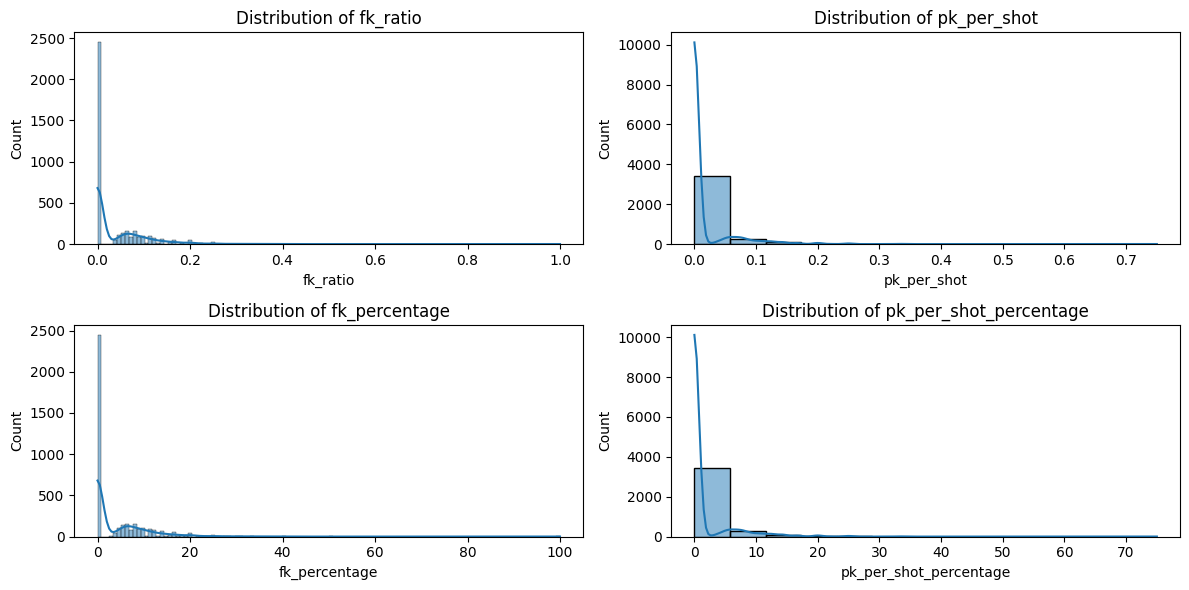

In [73]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
i = 0
for col in ['fk_ratio', 'pk_per_shot', 'fk_percentage', 'pk_per_shot_percentage']:
    sns.histplot(df_sorted[col], kde=True, ax=axs.flatten()[i])
    axs.flatten()[i].set_title('Distribution of ' + col)
    i += 1

plt.tight_layout()
plt.show()

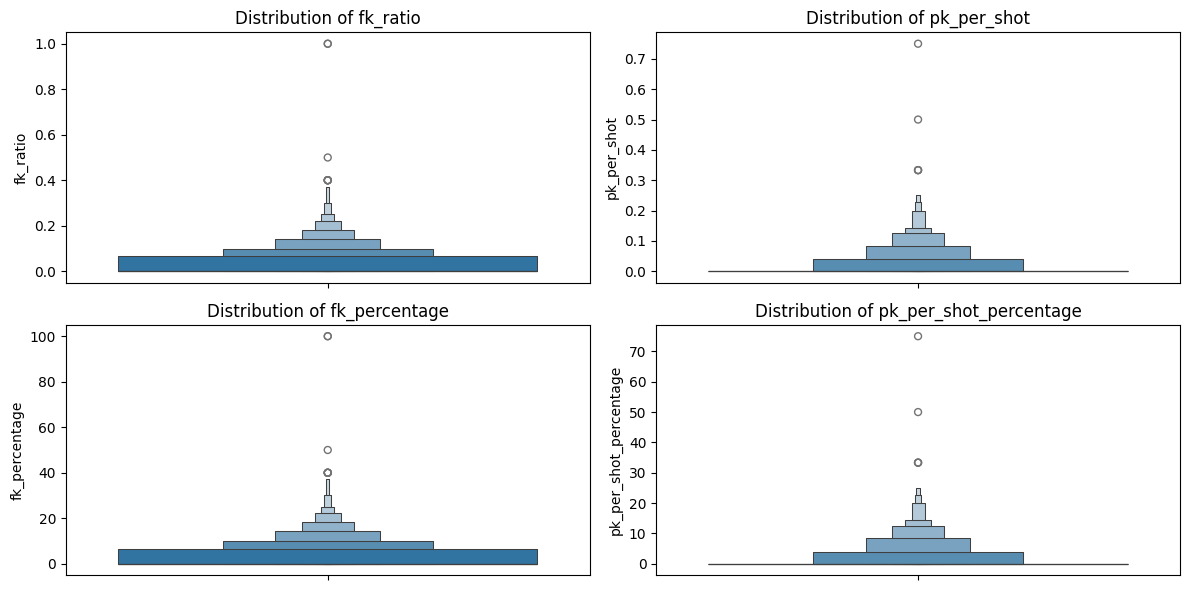

In [74]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
i = 0
for col in ['fk_ratio', 'pk_per_shot', 'fk_percentage', 'pk_per_shot_percentage']:
    sns.boxenplot(df_sorted[col], ax=axs.flatten()[i])
    axs.flatten()[i].set_title('Distribution of ' + col)
    i += 1

plt.tight_layout()
plt.show()

In [75]:
df_sorted.head()

,date,time,day,venue,result,gf,ga,opponent,xg,xga,...,season,team,hour,day_code,points,season_winner,fk_ratio,pk_per_shot,fk_percentage,pk_per_shot_percentage
0,2019-08-11,14:00 (15:00),Sunday,Away,W,1,0,Newcastle Utd,1.1,0.4,...,2020,Arsenal,14,6,3,Liverpool,0.000000,0.0,0.000000,0.0
1,2019-08-17,12:30 (13:30),Saturday,Home,W,2,1,Burnley,0.8,1.5,...,2020,Arsenal,12,5,3,Liverpool,0.000000,0.0,0.000000,0.0
2,2019-08-24,17:30 (18:30),Saturday,Away,L,1,3,Liverpool,1.0,2.5,...,2020,Arsenal,17,5,0,Liverpool,0.111111,0.0,11.111111,0.0
3,2019-09-01,16:30 (17:30),Sunday,Home,D,2,2,Tottenham,2.4,2.0,...,2020,Arsenal,16,6,1,Liverpool,0.076923,0.0,7.692308,0.0
4,2019-09-15,16:30 (17:30),Sunday,Away,D,2,2,Watford,0.8,2.7,...,2020,Arsenal,16,6,1,Liverpool,0.000000,0.0,0.000000,0.0


In [76]:
def calculate_rolling_average(data, column, window=5):
    """
    Calculate the rolling average of a column for each team.
    
    Parameters:
    data (DataFrame): The input DataFrame
    column (str): The column to calculate the rolling average for
    window (int): The number of games to include in the rolling average
    
    Returns:
    Series: The rolling average
    """
    return data.groupby('team')[column].transform(
        lambda x: x.rolling(window=window, min_periods=1).mean()
    )

In [77]:
df_sorted['rolling_xg'] = calculate_rolling_average(df_sorted, 'xg')
df_sorted['rolling_xga'] = calculate_rolling_average(df_sorted, 'xga')
df_sorted['rolling_poss'] = calculate_rolling_average(df_sorted, 'poss')
df_sorted['rolling_sh'] = calculate_rolling_average(df_sorted, 'sh')
df_sorted['rolling_sot'] = calculate_rolling_average(df_sorted, 'sot')
df_sorted['rolling_dist'] = calculate_rolling_average(df_sorted, 'dist')

In [78]:
df_sorted['result_encoded'] = pd.to_numeric(df_sorted['result'].map({'W': 1, 'D': 0, 'L': -1}))
df_sorted['form'] = calculate_rolling_average(df_sorted, 'result_encoded')

In [79]:
df_sorted['goal_diff'] = df_sorted['gf'] - df_sorted['ga']
df_sorted['rolling_goal_diff'] = calculate_rolling_average(df_sorted, 'goal_diff')

In [80]:
def get_head_to_head(data):
    """
    Calculate the head-to-head record against each opponent.
    
    Returns:
    DataFrame: The original dataframe with an additional column for head-to-head record
    """
    # Calculate the mean result for each team-opponent pair
    h2h = data.groupby(['team', 'opponent'])['result_encoded'].mean().reset_index()
    
    # Rename the mean column
    h2h = h2h.rename(columns={'result_encoded': 'h2h_record'})
    
    # Merge the h2h data back to the original dataframe
    result = pd.merge(data, h2h, on=['team', 'opponent'], how='left')
    
    return result

In [81]:
df_sorted = get_head_to_head(df_sorted)

# Convert date to day of week
df_sorted['day_of_week'] = pd.to_datetime(df_sorted['date']).dt.dayofweek


In [82]:
def categorize_time(time):
    hour = pd.to_datetime(time).hour
    if hour < 12:
        return 'early'
    elif hour < 17:
        return 'afternoon'
    else:
        return 'evening'

In [83]:
df_sorted['time'] = df_sorted['time'].apply(lambda x: x.split(' ')[0])
df_sorted['time_condition'] = df_sorted['time'].apply(categorize_time)

In [84]:
df_sorted['time_condition'].value_counts()

time_condition
afternoon    2337
evening      1462
Name: count, dtype: int64

In [85]:
df_sorted.groupby('team')['date'].count().sort_values(ascending=False)

team
Arsenal                     190
Liverpool                   190
West Ham United             190
Tottenham Hotspur           190
Newcastle United            190
Manchester United           190
Manchester City             190
Aston Villa                 190
Wolverhampton Wanderers     190
Everton                     190
Chelsea                     190
Brighton and Hove Albion    190
Crystal Palace              189
Leicester City              152
Burnley                     152
Southampton                 152
Fulham                      114
Leeds United                114
Bournemouth                 114
Sheffield United            114
Brentford                   114
Watford                      76
Norwich City                 76
Nottingham Forest            76
West Bromwich Albion         38
Luton Town                   38
Name: date, dtype: int64

In [86]:
df_sorted['days_since_last_match'] = df_sorted.groupby('team')['date'].diff().dt.days

In [87]:
df_sorted['days_since_last_match'].fillna(0, inplace=True)

In [88]:
df_sorted.to_csv('matches_final.csv', index=False)

# Modeling

In [89]:
columns_to_drop = ['gf', 'ga', 'xg', 'xga', 'poss', 'sh', 'sot', 
                   'goal_diff', 'day', 'pk', 'pkatt', 'fk', 
                   'referee', 'dist','points', 'season_winner', 'hour', 'result_encoded', 'day_code']
df_sorted = df_sorted.drop(columns=columns_to_drop)

In [90]:
df_sorted.head()

,date,time,venue,result,opponent,captain,formation,opp formation,season,team,...,rolling_poss,rolling_sh,rolling_sot,rolling_dist,form,rolling_goal_diff,h2h_record,day_of_week,time_condition,days_since_last_match
0,2019-08-11,14:00,Away,W,Newcastle Utd,Granit Xhaka,4-2-3-1,3-5-2,2020,Arsenal,...,62.0,8.000000,2.000000,13.900,1.000000,1.0,0.500,6,afternoon,0.0
1,2019-08-17,12:30,Home,W,Burnley,Nacho Monreal,4-2-3-1,4-4-2,2020,Arsenal,...,64.5,11.500000,5.500000,16.300,1.000000,1.0,0.375,5,afternoon,6.0
2,2019-08-24,17:30,Away,L,Liverpool,Granit Xhaka,4-3-1-2,4-3-3,2020,Arsenal,...,59.0,10.666667,4.666667,17.200,0.333333,0.0,-0.200,5,evening,7.0
3,2019-09-01,16:30,Home,D,Tottenham,Granit Xhaka,4-3-3,4-2-2-2,2020,Arsenal,...,58.0,14.500000,5.500000,17.425,0.250000,0.0,0.200,6,afternoon,8.0
4,2019-09-15,16:30,Away,D,Watford,Granit Xhaka,4-1-2-1-2,4-2-3-1,2020,Arsenal,...,56.0,13.000000,5.200000,18.100,0.200000,0.0,0.750,6,afternoon,14.0


In [91]:
num_cols = df_sorted.select_dtypes(include=np.number).columns
num_cols = num_cols.drop(['season']) 
num_cols = num_cols.tolist()
num_cols

['fk_ratio',
 'pk_per_shot',
 'fk_percentage',
 'pk_per_shot_percentage',
 'rolling_xg',
 'rolling_xga',
 'rolling_poss',
 'rolling_sh',
 'rolling_sot',
 'rolling_dist',
 'form',
 'rolling_goal_diff',
 'h2h_record',
 'day_of_week',
 'days_since_last_match']

In [99]:
cat_cols = df_sorted.select_dtypes(exclude=np.number).columns
cat_cols = cat_cols.drop(['result', 'date'])
cat_cols = cat_cols.tolist()
cat_cols

['time',
 'venue',
 'opponent',
 'captain',
 'formation',
 'opp formation',
 'team',
 'time_condition']

In [100]:
predictors = num_cols + cat_cols
len(predictors)

23

In [101]:
predictors

['fk_ratio',
 'pk_per_shot',
 'fk_percentage',
 'pk_per_shot_percentage',
 'rolling_xg',
 'rolling_xga',
 'rolling_poss',
 'rolling_sh',
 'rolling_sot',
 'rolling_dist',
 'form',
 'rolling_goal_diff',
 'h2h_record',
 'day_of_week',
 'days_since_last_match',
 'time',
 'venue',
 'opponent',
 'captain',
 'formation',
 'opp formation',
 'team',
 'time_condition']

In [102]:
cat_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ])


## Multiclass Classification (Win, Draw, Loss)

In [103]:
train = df_sorted[df_sorted["season"] <= 2023]
test = df_sorted[df_sorted["season"] > 2023]

In [104]:
train.shape, test.shape

((3039, 26), (760, 26))

In [105]:
label_enc = LabelEncoder()
train['result'] = label_enc.fit_transform(train['result'])
test['result'] = label_enc.transform(test['result'])

In [106]:
train['result'].value_counts()

result
2    1170
1    1170
0     699
Name: count, dtype: int64

In [107]:
lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(C=0.1))
])

lr.fit(train[predictors], train['result'])
preds_lr = lr.predict(test[predictors])
acc = accuracy_score(test['result'], preds_lr)
print(f'Accuracy: {acc * 100:.2f}%')

Accuracy: 65.26%


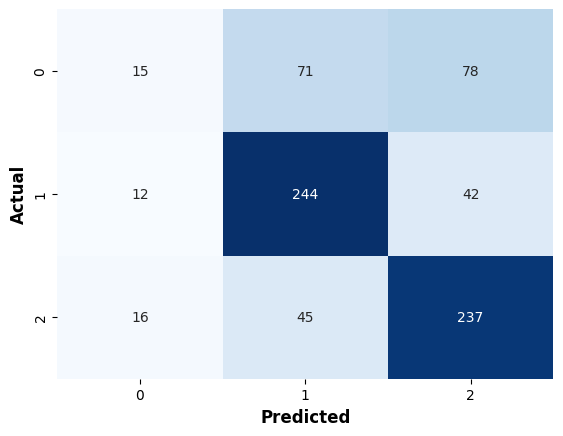

In [108]:
sns.heatmap(confusion_matrix(test['result'], preds_lr), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted', fontsize=12, fontweight='bold')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.show()

In [109]:

print(classification_report(test['result'], preds_lr))

              precision    recall  f1-score   support

           0       0.35      0.09      0.14       164
           1       0.68      0.82      0.74       298
           2       0.66      0.80      0.72       298

    accuracy                           0.65       760
   macro avg       0.56      0.57      0.54       760
weighted avg       0.60      0.65      0.61       760



In [110]:
def test_models(models, train, test, predictors, target):
    models_df = pd.DataFrame(columns=['Model', 'Accuracy'])
    for name, model in models.items():
    
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])
        
        pipeline.fit(train[predictors], train[target])
        
        preds = pipeline.predict(test[predictors])
        
        acc = accuracy_score(test[target], preds)
        models_df = pd.concat([models_df, pd.DataFrame({'Model': [name], 'Accuracy': [acc]})])
    models_df = models_df.sort_values(by='Accuracy', ascending=False)
    return models_df

In [111]:
models = {
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'RandomForestClassifier': RandomForestClassifier(n_jobs=1),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'BaggingClassifier': BaggingClassifier(n_jobs=1),
    'ExtraTreesClassifier': ExtraTreesClassifier(n_jobs=1),
    'LogisticRegression': LogisticRegression(),
    'LogisticRegressionL1': LogisticRegression(penalty='l1', solver='liblinear'),
    'SGDClassifier': SGDClassifier(),
    'RidgeClassifier': RidgeClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'MLPClassifier': MLPClassifier(),
    'SVC': SVC(),
    'LGBMClassifier': lgb.LGBMClassifier(verbose=0, n_jobs=1),
    'CatBoostClassifier': cb.CatBoostClassifier(silent=True),
    'XGBClassifier': xgb.XGBClassifier(n_jobs=1)
}


In [112]:
models_df = test_models(models, train, test, predictors, 'result')
models_df

,Model,Accuracy
0,ExtraTreesClassifier,0.665789
0,RidgeClassifier,0.657895
0,SVC,0.657895
0,LogisticRegressionL1,0.655263
0,RandomForestClassifier,0.651316
0,LGBMClassifier,0.646053
0,GradientBoostingClassifier,0.644737
0,CatBoostClassifier,0.643421
0,LogisticRegression,0.639474
0,SGDClassifier,0.632895


## Binary Classification (Win, Loss)

In [113]:
df_sorted_binary = df_sorted.copy()

df_sorted_binary['result'] = df_sorted_binary['result'].apply(lambda x: 1 if x == 'W' else 0)

In [114]:
for col in df_sorted_binary.select_dtypes(include='object').columns:
    df_sorted_binary[col] = df_sorted_binary[col].astype('category')

In [115]:
train_binary = df_sorted_binary[df_sorted_binary["season"] <= 2023]
test_binary = df_sorted_binary[df_sorted_binary["season"] > 2023]

In [116]:
train_binary.shape, test_binary.shape

((3039, 26), (760, 26))

In [117]:
lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

lr.fit(train_binary[predictors], train_binary['result'])
preds_lr = lr.predict(test_binary[predictors])
acc = accuracy_score(test_binary['result'], preds_lr)
print(f'Accuracy: {acc * 100:.2f}%')

Accuracy: 77.89%


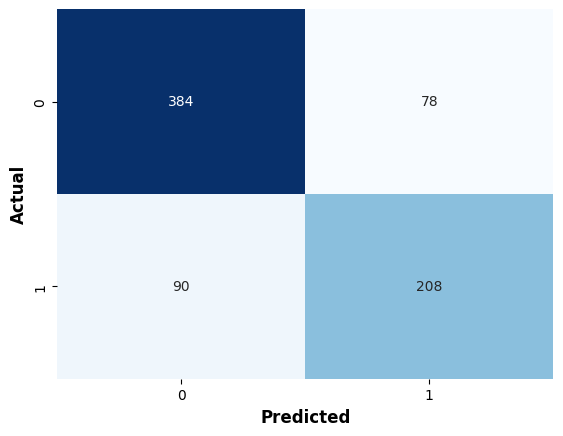

In [118]:
sns.heatmap(confusion_matrix(test_binary['result'], preds_lr), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted', fontsize=12, fontweight='bold')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.show()

In [119]:
print(classification_report(test_binary['result'], preds_lr))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       462
           1       0.73      0.70      0.71       298

    accuracy                           0.78       760
   macro avg       0.77      0.76      0.77       760
weighted avg       0.78      0.78      0.78       760



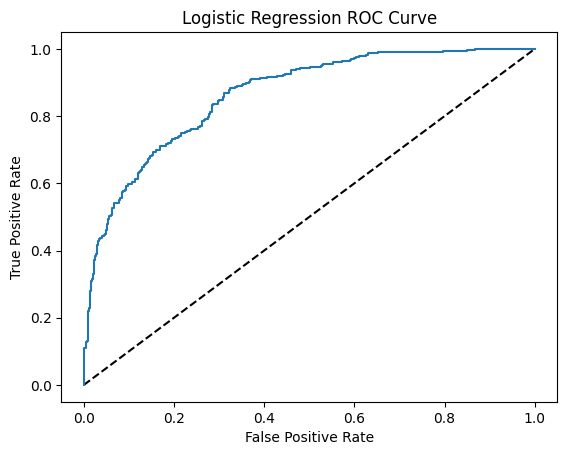

In [120]:
y_pred_prob = lr.predict_proba(test_binary.drop('result', axis=1))[:, 1]
roc_auc = roc_auc_score(test_binary['result'], y_pred_prob)
fpr, tpr, thresholds = roc_curve(test_binary['result'], y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [121]:
# Access the logistic regression classifier from the pipeline
classifier = lr.named_steps['classifier']

# Get the coefficients (feature importance)
feature_importance = classifier.coef_[0]

# Get the feature names
feature_names = train_binary[predictors].columns

# Pair feature names with their importance
features_importance_dict = dict(zip(feature_names, feature_importance))

# Sort the features by their importance
sorted_features = sorted(features_importance_dict.items(), key=lambda x: np.abs(x[1]), reverse=True)


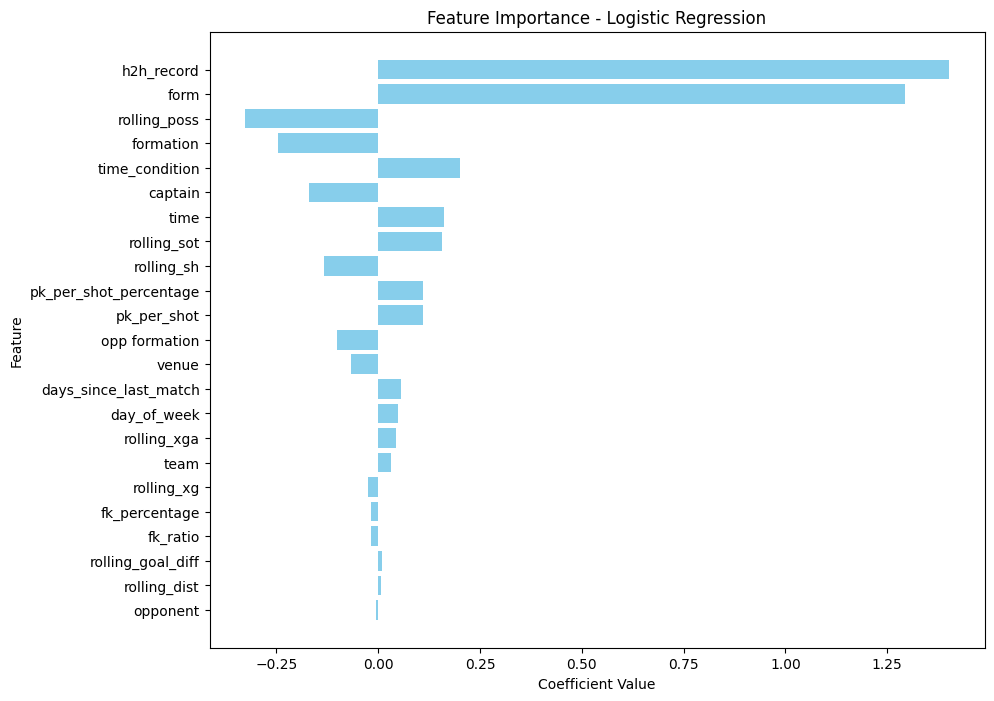

In [122]:
# Unzip the sorted features
features, importance = zip(*sorted_features)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(features, importance, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance - Logistic Regression')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


In [123]:
gb= Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])
gb.fit(train_binary[predictors], train_binary['result'])
preds_gb = gb.predict(test_binary[predictors])
acc = accuracy_score(test_binary['result'], preds_gb)
print(f'Accuracy: {acc * 100:.2f}%')

Accuracy: 78.68%


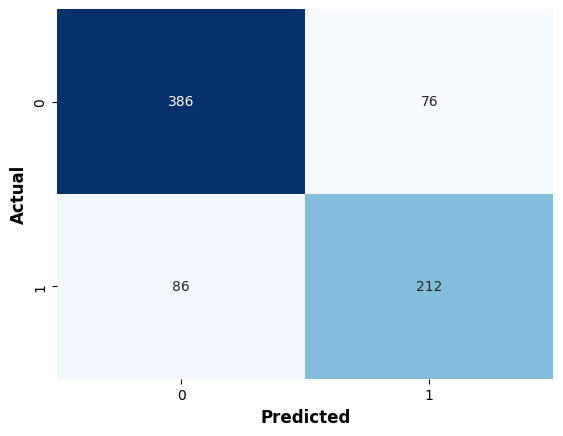

In [124]:
sns.heatmap(confusion_matrix(test_binary['result'], preds_gb), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted', fontsize=12, fontweight='bold')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.show()

In [125]:
print(classification_report(test_binary['result'], preds_gb))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       462
           1       0.74      0.71      0.72       298

    accuracy                           0.79       760
   macro avg       0.78      0.77      0.78       760
weighted avg       0.79      0.79      0.79       760



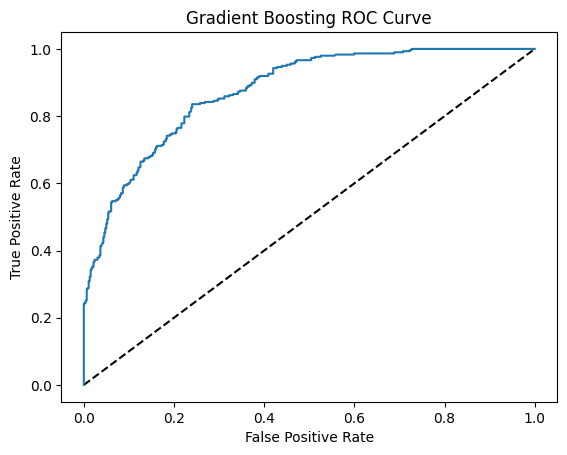

In [126]:
y_pred_prob = gb.predict_proba(test_binary.drop('result', axis=1))[:, 1]
roc_auc = roc_auc_score(test_binary['result'], y_pred_prob)
fpr, tpr, thresholds = roc_curve(test_binary['result'], y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve')
plt.show()

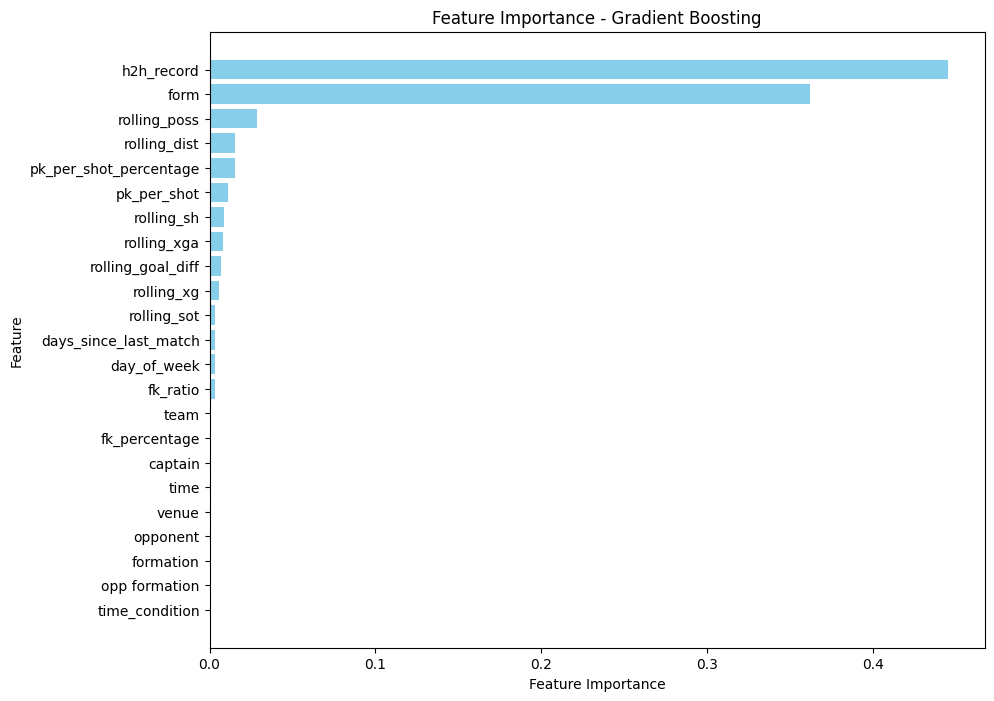

In [127]:
feature_importance = gb.named_steps['classifier'].feature_importances_

# Pair feature names with their importance
features_importance_dict = dict(zip(feature_names, feature_importance))

# Sort the features by their importance
sorted_features = sorted(features_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Unzip the sorted features
features, importance = zip(*sorted_features)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(features, importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Gradient Boosting')
plt.gca().invert_yaxis()  
plt.show()

In [142]:
models = {
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'RandomForestClassifier': RandomForestClassifier(n_jobs=1),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'BaggingClassifier': BaggingClassifier(n_jobs=1),
    'ExtraTreesClassifier': ExtraTreesClassifier(n_jobs=1),
    'LogisticRegression': LogisticRegression(),
    'LogisticRegressionL1': LogisticRegression(penalty='l1', solver='liblinear'),
    'SGDClassifier': SGDClassifier(),
    'RidgeClassifier': RidgeClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'MLPClassifier': MLPClassifier(),
    'SVC': SVC(),
    'LGBMClassifier': lgb.LGBMClassifier(verbose=0, n_jobs=1),
    'CatBoostClassifier': cb.CatBoostClassifier(silent=True),
    'XGBClassifier': xgb.XGBClassifier(n_jobs=1)
}


In [143]:
model_binary = test_models(models, train_binary, test_binary, predictors, 'result')
model_binary

In [130]:
gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])

gb.fit(train_binary[predictors], train_binary['result'])
preds_gb = gb.predict(test_binary[predictors])
acc = accuracy_score(test_binary['result'], preds_gb)
print(f'Accuracy: {acc * 100:.2f}%')

Accuracy: 78.82%


In [131]:
import pickle
with open('grad_boost.pkl', 'wb') as f:
    pickle.dump(gb, f)

In [132]:
cat = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', cb.CatBoostClassifier(silent=True))
])

cat.fit(train_binary[predictors], train_binary['result'])
preds_cat = cat.predict(test_binary[predictors])
acc = accuracy_score(test_binary['result'], preds_cat)
print(f'Accuracy: {acc * 100:.2f}%')

Accuracy: 78.16%


In [133]:
et = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', ExtraTreesClassifier(random_state=42))
])

et.fit(train_binary[predictors], train_binary['result'])
preds_et = et.predict(test_binary[predictors])
acc = accuracy_score(test_binary['result'], preds_et)
print(f'Accuracy: {acc * 100:.2f}%')

Accuracy: 76.32%


In [134]:
svc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(C=0.01, kernel='linear'))
])

svc.fit(train_binary[predictors], train_binary['result'])
preds_svc = svc.predict(test_binary[predictors])
acc = accuracy_score(test_binary['result'], preds_svc)
print(f'Accuracy: {acc * 100:.2f}%')

Accuracy: 78.95%


In [135]:
st = StackingClassifier(estimators=[
    ('svc', SVC(C=0.01, kernel='linear')),
    ('lr', LogisticRegression()),
    ('gb', GradientBoostingClassifier()),
    ('et', ExtraTreesClassifier(random_state=42))
], final_estimator=LogisticRegression())

st_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', st)
])

st_pipe.fit(train_binary[predictors], train_binary['result'])
preds_st = st_pipe.predict(test_binary[predictors])
acc = accuracy_score(test_binary['result'], preds_st)
print(f'Accuracy: {acc * 100:.2f}%')

Accuracy: 79.08%


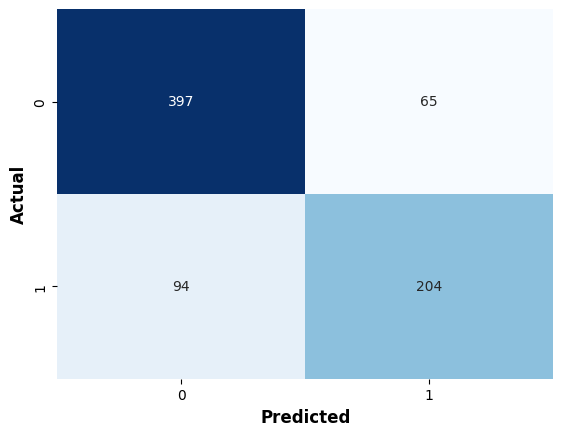

In [136]:
sns.heatmap(confusion_matrix(test_binary['result'], preds_st), annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted', fontsize=12, fontweight='bold')
plt.ylabel('Actual', fontsize=12, fontweight='bold')

plt.show()

In [137]:
print(classification_report(test_binary['result'], preds_st))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       462
           1       0.76      0.68      0.72       298

    accuracy                           0.79       760
   macro avg       0.78      0.77      0.78       760
weighted avg       0.79      0.79      0.79       760



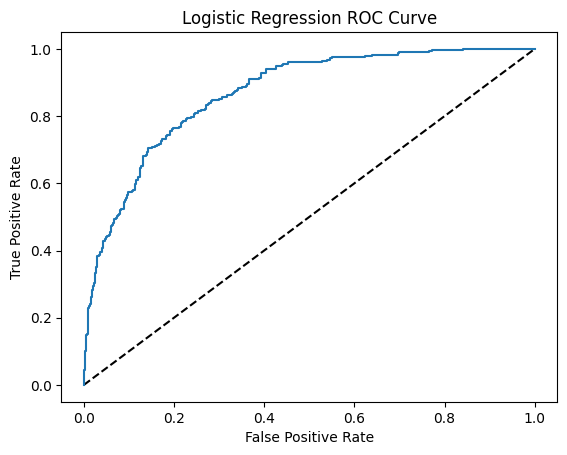

In [138]:
y_pred_prob = st_pipe.predict_proba(test_binary.drop('result', axis=1))[:, 1]
roc_auc = roc_auc_score(test_binary['result'], y_pred_prob)
fpr, tpr, thresholds = roc_curve(test_binary['result'], y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

## Neural Network model

In [139]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau
    


train_binary_preprocessed = preprocessor.fit_transform(train_binary[predictors]).toarray()
test_binary_preprocessed = preprocessor.transform(test_binary[predictors]).toarray()

model = Sequential()
model.add(Dense(128, input_dim=train_binary_preprocessed.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile model with a custom learning rate
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        35,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,441 (177.50 KB)

 Trainable params: 45,441 (177.50 KB)

 Non-trainable params: 0 (0.00 B)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(train_binary_preprocessed, train_binary['result'], test_size=0.2, random_state=42)

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])

_, acc = model.evaluate(test_binary_preprocessed, test_binary['result'])

Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6616 - loss: 0.8840 - val_accuracy: 0.7516 - val_loss: 0.7132 - learning_rate: 0.0010
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7624 - loss: 0.6995 - val_accuracy: 0.7401 - val_loss: 0.6646 - learning_rate: 0.0010
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8044 - loss: 0.6210 - val_accuracy: 0.7434 - val_loss: 0.6436 - learning_rate: 0.0010
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7964 - loss: 0.5884 - val_accuracy: 0.7467 - val_loss: 0.6354 - learning_rate: 0.0010
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8072 - loss: 0.5625 - val_accuracy: 0.7434 - val_loss: 0.6239 - learning_rate: 0.0010
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8188 - loss: 0.5221 - val_accuracy: 0.7401 - val_loss: 0.6285 - learning_rate: 0.0010
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8263 - loss: 0.5154 - val_acc

In [141]:
print(f'Accuracy: {acc * 100:.2f}%')

Accuracy: 77.24%


Here we reached to the end of the notebook and the most accuarate model was **Stacking Classifier model** with **79.08%** accuracy with binary classification (Win, Loss).

<center>
<br> <span style="font-family:Cambria; font-weight:bold;">Thank you for your upvote.</span><br>
<br> <span style="font-size:26px; font-family:Cambria; font-weight:bold;">Mohamed Kardosha</span>
</center>